In [1]:
import numpy as np
import matplotlib
from  matplotlib import pyplot as plt

from scipy import stats
# import scienceplots

# plt.style.use(['science','ieee'])
# plt.rcParams.update({'figure.dpi': '100'})

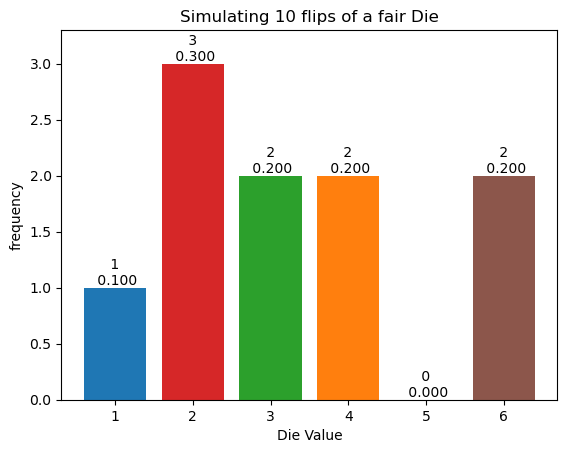

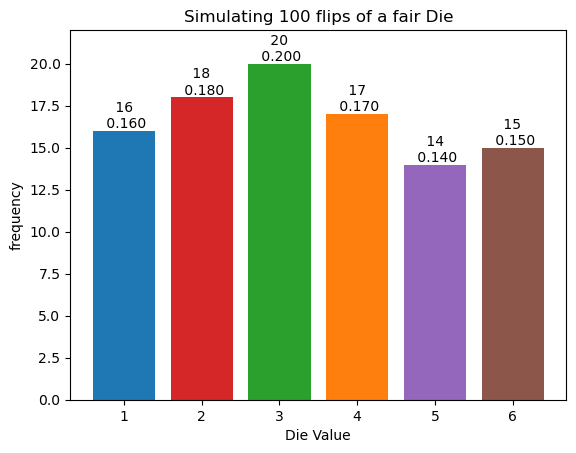

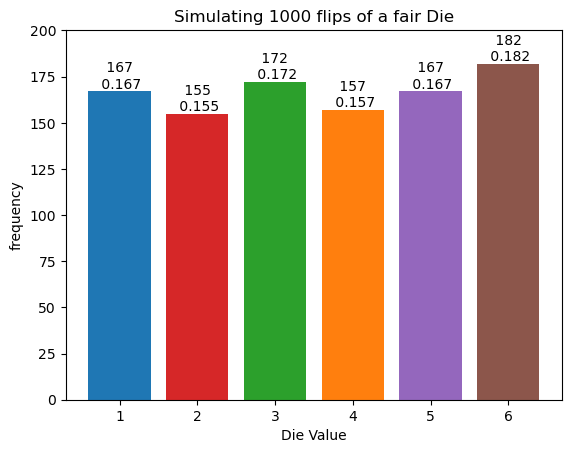

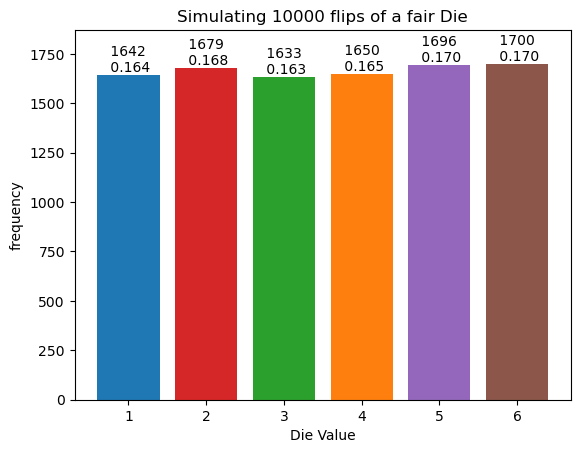

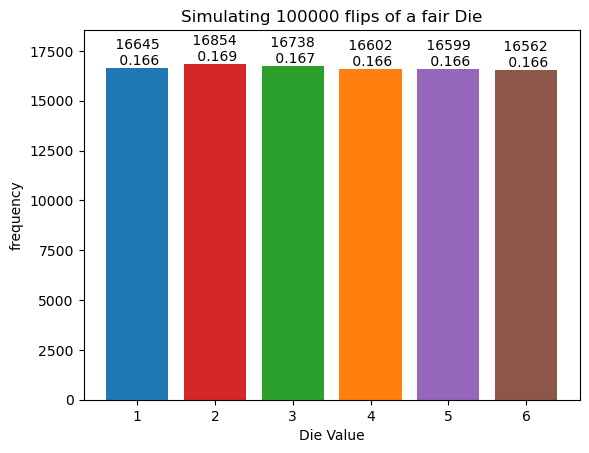

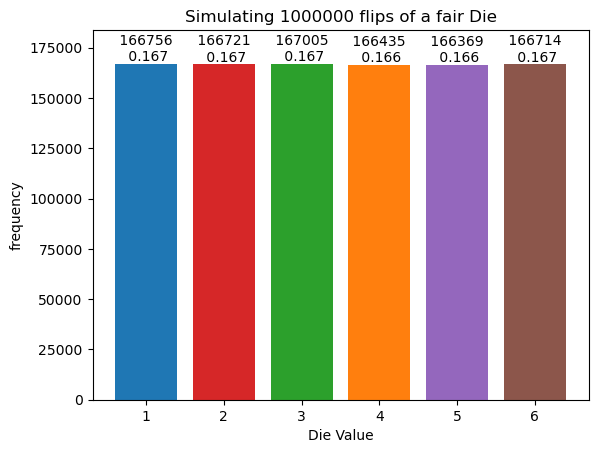

In [2]:
def simulate(n):
    x_bars = [np.random.randint(low=1, high=7) for _ in range(n)]
    freq, lab, _ = plt.hist(x_bars, np.arange(1, 8), density=False)
    # stop matplotlib from showing the hist, it's untidy
    plt.close()
    fig, ax = plt.subplots()
    # ax.grid(axis='y')
    bar_container = plt.bar(
        lab[:-1],
        freq,
        color=['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown'],
    )
    prob = np.divide(freq, np.sum(freq))
    # print(prob)
    ax.set(
        xlabel='Die Value',
        ylabel='frequency',
        title=f'Simulating {n} flips of a fair Die',
        # 1.1 below is experimantaly determined, to keep the bar labels within the figure
        ylim=(0, 1.1 * freq.max()),
    )
    ax.bar_label(
        bar_container,
        labels=[f' {int(fr):d} \n {p:.3f}' for p,fr in zip(prob, freq)]
    )
    plt.show()

simulate(10)
simulate(100)
simulate(1000)
simulate(10000)
simulate(100000)
simulate(1000000)

3.5 2.9166666666666665 2.9166666666666665 1.707825127659933 1.707825127659933
10 3.5138888888888884 0.18997847506403015 0.14231876063832774
20 3.5670138888888894 0.1708146302995815 0.14231876063832774
40 3.4923611111111112 0.17145044365538875 0.14231876063832774
80 3.4926215277777777 0.1354092935581792 0.14231876063832774
160 3.5089409722222222 0.13901770827219212 0.14231876063832774
320 3.4902126736111114 0.143259872484595 0.14231876063832774
640 3.501019965277777 0.14844110257720136 0.14231876063832774
1280 3.498779296875 0.13741808151837234 0.14231876063832774
2560 3.4988091362847222 0.14104097897080056 0.14231876063832774
5120 3.5018649631076384 0.14501977237 0.14231876063832774
10240 3.501485188802083 0.14091211016992142 0.14231876063832774
20480 3.5008517795138885 0.14291095266647597 0.14231876063832774
40960 3.5010438707139757 0.142732632694496 0.14231876063832774
81920 3.5008241441514762 0.14234523576037486 0.14231876063832774
163840 3.4997225019666884 0.1423703688257731 0.1423

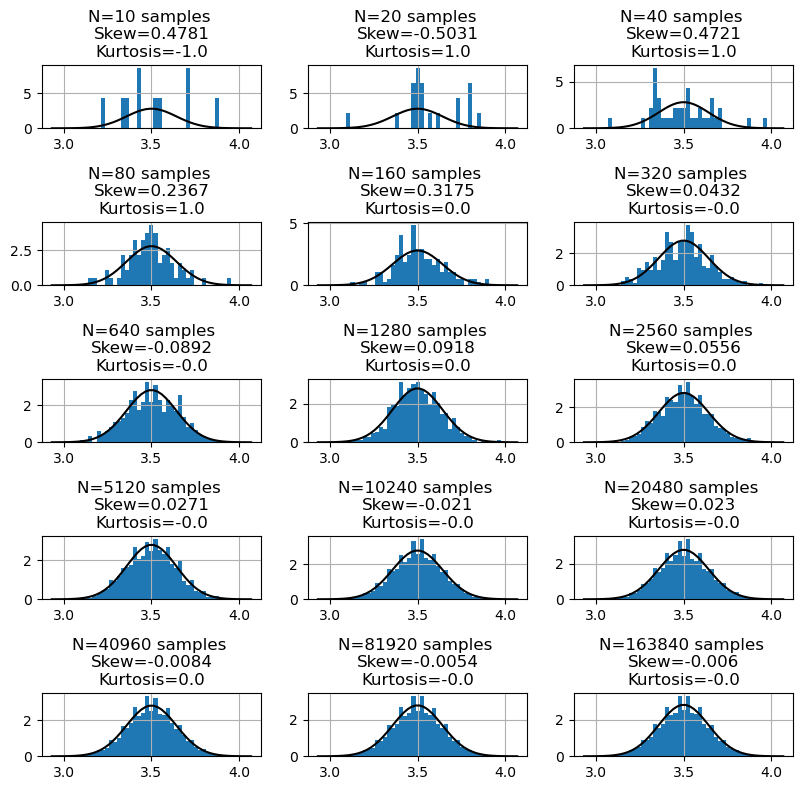

In [3]:
K = 144
N = 10

mu = np.arange(1, 7).sum() / 6
sigma2 = np.array([(x-mu)**2 for x in np.arange(1,7)]).sum() / 6
sd = np.sqrt(sigma2)

GRID = np.linspace(mu-4*sd/np.sqrt(K), mu+4*sd/np.sqrt(K), 50)

print(mu, sigma2, np.var(np.arange(1,7)), sd, np.std(np.arange(1,7)))

def f(x, mu, sd):
    return 1.0/(np.sqrt(2*np.pi)*sd)*np.exp(-1/2*((x-mu)/sd)**2)

fx = np.array([f(x, mu, sd/np.sqrt(K)) for x in GRID])


fig, ax = plt.subplots(5, 3, figsize=(8, 8))#, sharex=True, sharey=True)
for i in range(5):
    for j in range(3):
        xbars = np.array([np.mean(np.random.randint(low=1, high=7, size=K)) for _ in range(N)])
        skew = np.round(stats.skew(xbars, bias=False), 4)
        kurtosis = np.round(stats.kurtosis(xbars, fisher=True, bias=False))
        ax[i,j].hist(xbars, GRID, density=True)
        ax[i,j].set_title(f'N={N} samples \nSkew={skew}\nKurtosis={kurtosis}')
        ax[i,j].plot(GRID, fx, 'k-')
        ax[i,j].grid()
        #ax[i,j].set_ylim(0, 1.1)
        print(N, xbars.mean(), xbars.std(), sd/np.sqrt(K))
        
        N *= 2
plt.tight_layout()